# 데이터 EDA

## 패키지 설치, 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

# 경로 설정
data_path = '../../data'
saved_path = './../saved'
output_path = './../submission'

In [2]:
# 데이터 불러오기
# 시청 시작/종료 데이터
history_df = pd.read_csv(os.path.join(data_path, 'history_data.csv'), encoding='utf-8')
watch_df = pd.read_csv(os.path.join(data_path, 'watch_e_data.csv'), encoding='utf-8')

# 구매/검색 데이터
buy_df = pd.read_csv(os.path.join(data_path, 'buy_data.csv'), encoding='utf-8')
search_df = pd.read_csv(os.path.join(data_path, 'search_data.csv'), encoding='utf-8')

# 콘텐츠(아이템) 메타정보 데이터
meta_df = pd.read_csv(os.path.join(data_path, 'meta_data.csv'), encoding='utf-8')
meta_plus_df = pd.read_csv(os.path.join(data_path, 'meta_data_plus.csv'), encoding='utf-8')

# 유저 프로필 데이터
profile_df = pd.read_csv(os.path.join(data_path, 'profile_data.csv'), encoding='utf-8')

# 제출 파일 데이터
submission_df = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'), encoding='utf-8')


## 데이터 테이블 이해해보기

### 유저 - 아이템 상호작용 데이터에 대해

In [4]:
def info(table):
    all_nums = table.shape[0]
    item_nums = table['album_id'].nunique()
    user_nums = table['profile_id'].nunique()
    act_value = table['act_target_dtl'][0]
    print(f'테이블 총 길이는 {all_nums}')
    print(f'아이템 개수는 {item_nums}')
    print(f'유저 수는 {user_nums}')
    print(f'act_target_dtl 변수는 {act_value}')
    print('')

print('history_df')
info(history_df)
print('watch_df')
info(watch_df)
print('buy_df')
info(buy_df)
print('search_df')
info(search_df)
history_df.sample(3)

history_df
테이블 총 길이는 1005651
아이템 개수는 20695
유저 수는 8311
act_target_dtl 변수는 MKID003

watch_df
테이블 총 길이는 892794
아이템 개수는 20361
유저 수는 7658
act_target_dtl 변수는 MKID049

buy_df
테이블 총 길이는 150
아이템 개수는 126
유저 수는 17
act_target_dtl 변수는 MKID004

search_df
테이블 총 길이는 6474
아이템 개수는 1977
유저 수는 644
act_target_dtl 변수는 MKID017



,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
350249,7869,20220414223852,20220414234825,MKID003,2501,NaN,N,N
94794,2536,20220412202115,20220412202721,MKID003,80,NaN,Y,N
127045,2794,20220423001324,20220423001927,MKID003,241,NaN,N,N


history, watch, buy, search 총 4개 테이블이 유저와 아이템 간 상호작용 테이블 입니다.

act_target_dtl은 로그 데이터에서 4개 테이블로 분류하기 위한 변수로 파악됩니다.

history와 watch은 시청-종료를 각각 기록한 테이블로 파악됩니다. 

buy와 search 테이블은 history 테이블과 대비해 충분한 기록을 하고 있지 못합니다.

그러므로 유저-아이템 상호작용은 history 테이블을 주로 사용할 것 입니다.

In [5]:
print(history_df['profile_id'].nunique())
print(submission_df['profile_id'].nunique())

8311
8311


대회는 3~4월과 5~7월에 시청 기록이 모두 있는 8311명의 유저를 대상으로 진행됩니다.

In [6]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005651 entries, 0 to 1005650
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   profile_id       1005651 non-null  int64  
 1   ss_id            1005651 non-null  int64  
 2   log_time         1005651 non-null  int64  
 3   act_target_dtl   1005651 non-null  object 
 4   album_id         1005651 non-null  int64  
 5   payment          73486 non-null    float64
 6   continuous_play  1005651 non-null  object 
 7   short_trailer    1005651 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 61.4+ MB


<AxesSubplot: >

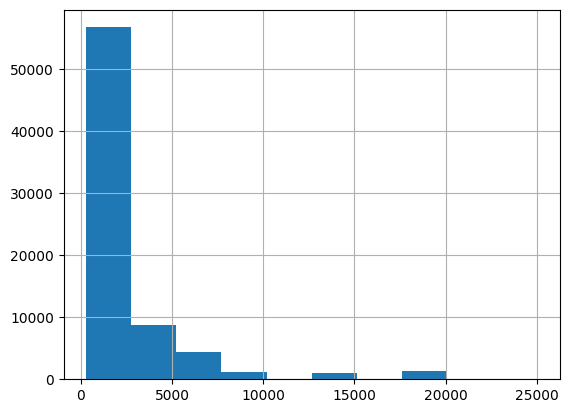

In [7]:
history_df['payment'].hist()

payment 변수가 과도하게 결측치가 있는 것을 제외하고 다른 변수들은 결측치가 없습니다.

payment 변수의 히스토그램을 바탕으로 나름의 추론을 해보면 결측치는 무료로 시청한 것을 의미하는 것 같아요.

### 아이템에 대해

In [8]:
print(meta_df.shape)
print(meta_plus_df.shape)
print('meta 테이블 아이템 개수는', meta_df['album_id'].nunique())
print('meta_plus 테이블 아이템 개수는', meta_plus_df['album_id'].nunique())
print('history 테이블 아이템 개수는', history_df['album_id'].nunique())

(42602, 16)
(767948, 4)
meta 테이블 아이템 개수는 39875
meta_plus 테이블 아이템 개수는 39875
history 테이블 아이템 개수는 20695


기록되어있는 아이템의 개수는 약 4만개 입니다. 

다만 history 테이블에 있는 아이템은 2만개로 절반정도 아이템은 3~4월에 소비되지 않았습니다.

In [10]:
meta_df.sample(3)

,album_id,title,sub_title,genre_large,genre_mid,genre_small,country,run_time,onair_date,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,cast_7
12913,16127,버려 버려 다 버려! 외,엘리의 생활동화1,키즈,놀이교실,독서동화,NaN,746,NaN,엘리,NaN,NaN,NaN,NaN,NaN,NaN
7607,24065,새콤달콤! 쑥버무리!,빵빵 요리 버스,키즈,놀이교실,창의학습,NaN,838,20160411.0,토미,새미,빵빵,NaN,NaN,NaN,NaN
20509,34503,Silly Little Duck,열매(6단계) 레벨,키즈,외국어,영어,한국,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42602 entries, 0 to 42601
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   album_id     42602 non-null  int64  
 1   title        42602 non-null  object 
 2   sub_title    42602 non-null  object 
 3   genre_large  42602 non-null  object 
 4   genre_mid    42602 non-null  object 
 5   genre_small  13419 non-null  object 
 6   country      33734 non-null  object 
 7   run_time     42602 non-null  int64  
 8   onair_date   5344 non-null   float64
 9   cast_1       27603 non-null  object 
 10  cast_2       22048 non-null  object 
 11  cast_3       16463 non-null  object 
 12  cast_4       12485 non-null  object 
 13  cast_5       6382 non-null   object 
 14  cast_6       2609 non-null   object 
 15  cast_7       762 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 5.2+ MB


meta 테이블은 아이템 이름, 소제목, 분류들, 런타임, 주인공 등으로 이루어져 있습니다.

다만 대부분의 칼럼에서 NULL 값이 많습니다. Content 기반으로 아이템을 분석하여 추천하기에는 조금 부족한 데이터로 생각됩니다.

In [115]:
meta_df['album_id'].value_counts()

8231     4
4083     4
4932     4
5314     4
3843     4
        ..
16963    1
32433    1
32434    1
32435    1
11629    1
Name: album_id, Length: 39875, dtype: int64

앨범은 실제 39875개 존재하지만 meta 테이블 행 개수는 42602개가 존재합니다.

왜 수천 개가 늘어났는지 살펴보면 일부 아이템이 여러 번 포함되어 있는 것이 확인됩니다.

In [116]:
meta_df[(meta_df['album_id'] == 8231)]

,album_id,title,sub_title,genre_large,genre_mid,genre_small,country,run_time,onair_date,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,cast_7
13526,8231,알록달록 물고기,노래율동,키즈,노래율동,NaN,한국,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13527,8231,알록달록 물고기,만 3세를 위한 영상,키즈,노래율동,NaN,한국,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13528,8231,알록달록 물고기,만 4세를 위한 영상,키즈,노래율동,NaN,한국,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13529,8231,알록달록 물고기,트니트니 율동 바다스페셜,키즈,노래율동,NaN,한국,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
meta_df.drop(['sub_title'], axis = 1).drop_duplicates().reset_index(drop = True).shape[0]

39875

조금 더 자세히 살펴본 결과 sub_title만 다르고 나머지 형태는 일치하는 것이 보이네요.

sub_title을 제외한 뒤 중복을 관찰해보니 정확히 39875개 나왔습니다.

In [22]:
print('meta_plus 테이블 행 길이 : ', meta_plus_df.shape[0])
print('')
print('meta_plus 테이블 예시')
print(meta_plus_df.head(3))
print('')
print('아이템 별 meta_plus 테이블 개수')
print(meta_plus_df['album_id'].value_counts())

meta_plus 테이블 행 길이 :  767948

meta_plus 테이블 예시
   album_id keyword_type keyword_name  keyword_value
0       749     05010101          시리즈              0
1       749     05010302          EBS              0
2       749     05010401           3세              0

아이템 별 meta_plus 테이블 개수
22057    99
15927    98
1216     95
15942    95
12000    95
         ..
32763     1
30849     1
33603     1
30847     1
37418     1
Name: album_id, Length: 39875, dtype: int64


meta_plus 테이블은 meta과 다르게 아이템 별로 keyword_name이 최대 99개로 많이 배정되어 있습니다.

그렇기 때문에 아이템이 약 4만개더라도 meta_plus 테이블 행 길이는 약 76만개가 있는 것 같아요.

### 유저에 대해

In [27]:
profile_df.sample(3)

,profile_id,sex,age,pr_interest_keyword_cd_1,pr_interest_keyword_cd_2,pr_interest_keyword_cd_3,ch_interest_keyword_cd_1,ch_interest_keyword_cd_2,ch_interest_keyword_cd_3
5475,20075,F,5,P06,P08,P04,K01,K04,K07
6015,22067,F,9,P01,P07,P08,K03,K05,K06
8297,32984,F,4,P06,NaN,NaN,K01,K02,K04


In [28]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8311 entries, 0 to 8310
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   profile_id                8311 non-null   int64 
 1   sex                       8311 non-null   object
 2   age                       8311 non-null   int64 
 3   pr_interest_keyword_cd_1  8311 non-null   object
 4   pr_interest_keyword_cd_2  6778 non-null   object
 5   pr_interest_keyword_cd_3  6231 non-null   object
 6   ch_interest_keyword_cd_1  8311 non-null   object
 7   ch_interest_keyword_cd_2  6618 non-null   object
 8   ch_interest_keyword_cd_3  6029 non-null   object
dtypes: int64(2), object(7)
memory usage: 584.5+ KB


profile 테이블을 관찰했습니다. 유저 나이, 성별, 부모/아이의 관심 키워드가 존재합니다.

부모 관심 키워드 2,3과 아이 관심 키워드 2,3은 null값이 존재하지만 1순위는 결측치 없습니다.

## History 테이블 집중 탐구 해보기.

In [33]:
duplicate = sum(history_df[['profile_id', 'log_time', 'album_id']].duplicated())
print(f'총 데이터 {history_df.shape[0]}개 중 중복 값은 {duplicate}개 입니다')

총 데이터 1005651개 중 중복 값은 106399개 입니다


전체 데이터 중 약 10%가 동일한 유저가 같은 아이템을 동일한 시각에 보았다고 기록됬습니다.

의미 없는 중복만을 야기한다고 판단하여 제외하였습니다.

In [39]:
history_df['album_id'].value_counts()[:20]

16      12643
15       8695
19       7089
17       6528
18       6484
124      6410
38       5989
241      5218
125      4569
65       4382
224      3864
339      3845
228      3704
1880     3665
347      3658
225      3401
39       3311
329      3251
3502     3159
190      3119
Name: album_id, dtype: int64

<AxesSubplot: >

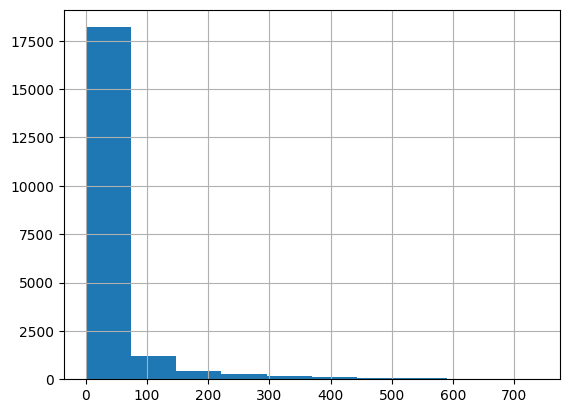

In [60]:
history_df['album_id'].value_counts()[200:].hist()

유저-아이템 상호작용 테이블에서 인기 아이템이 무엇인지 살펴봤는데요.

일부 아이템(16, 15 ..)은 시청횟수가 굉장히 높습니다.

일부 아이템을 제외한 히스토그램을 보면 아이템의 인기가 상당히 편향된 것을 알 수 있습니다.

In [41]:
history_df.head()

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
0,3,20220301115653,20220301115719,MKID003,15,NaN,Y,N
1,3,20220301115653,20220301115809,MKID003,16,NaN,Y,N
2,3,20220301115653,20220301115958,MKID003,17,NaN,Y,N
3,3,20220301115653,20220301120118,MKID003,18,NaN,Y,N
4,3,20220301115653,20220301120229,MKID003,19,NaN,Y,N


In [45]:
history_df['profile_id'].value_counts()[:10]

2794     18190
3847     14014
13450     8086
6155      5606
6107      5495
22292     4827
10241     4490
7708      3699
25386     3572
17424     3468
Name: profile_id, dtype: int64

일부 유저는 만개가 넘는 시청기록이 있는 등 유저를 기준으로 관찰해도 데이터 개수의 편차가 큽니다.

In [47]:
n = 5
sum(history_df['profile_id'].value_counts() <= n)

1321

특히 5개 이하의 시청기록을 가진 유저가 약 1300명인데요. cold start 유저가 상당한 것을 알 수 있어요.

In [58]:
data = history_df[['profile_id', 'log_time', 'album_id']].drop_duplicates(subset=['profile_id', 'album_id', 'log_time'])
u_num = data['profile_id'].nunique()
i_num = data['album_id'].nunique()
print(f'유저 수 : {u_num}, 아이템 수 : {i_num}, 유저-아이템 칼럼수 : {data.shape[0]}')
print(f'이상적인 유저-아이템 칼럼 수 : {u_num*i_num}, 결측 값 비율 : {np.round((1-data.shape[0]/(u_num*i_num))*100,4)}%')

유저 수 : 8311, 아이템 수 : 20695, 유저-아이템 칼럼수 : 899252
이상적인 유저-아이템 칼럼 수 : 171996145, 결측 값 비율 : 99.4772%


유저-아이템 칼럼의 결측 값 비율은 99.4772%로 다른 테이블 대비 결측 값 비율이 심각하지 않습니다.

다만 특정 유저나 아이템에 한에서 데이터가 굉장히 많은 점, 네거티브 반응이 없는 점은 모델링을 어렵게 하는 부분입니다.

## 칼럼 별 아이템 분포도 알아보기.